In [23]:
import sys
import time
from IPython.display import clear_output

line = "your message"
for i in range(1000):
    if i % 1 == 0:
        clear_output()
        print(i)
    time.sleep(0.1)

32


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


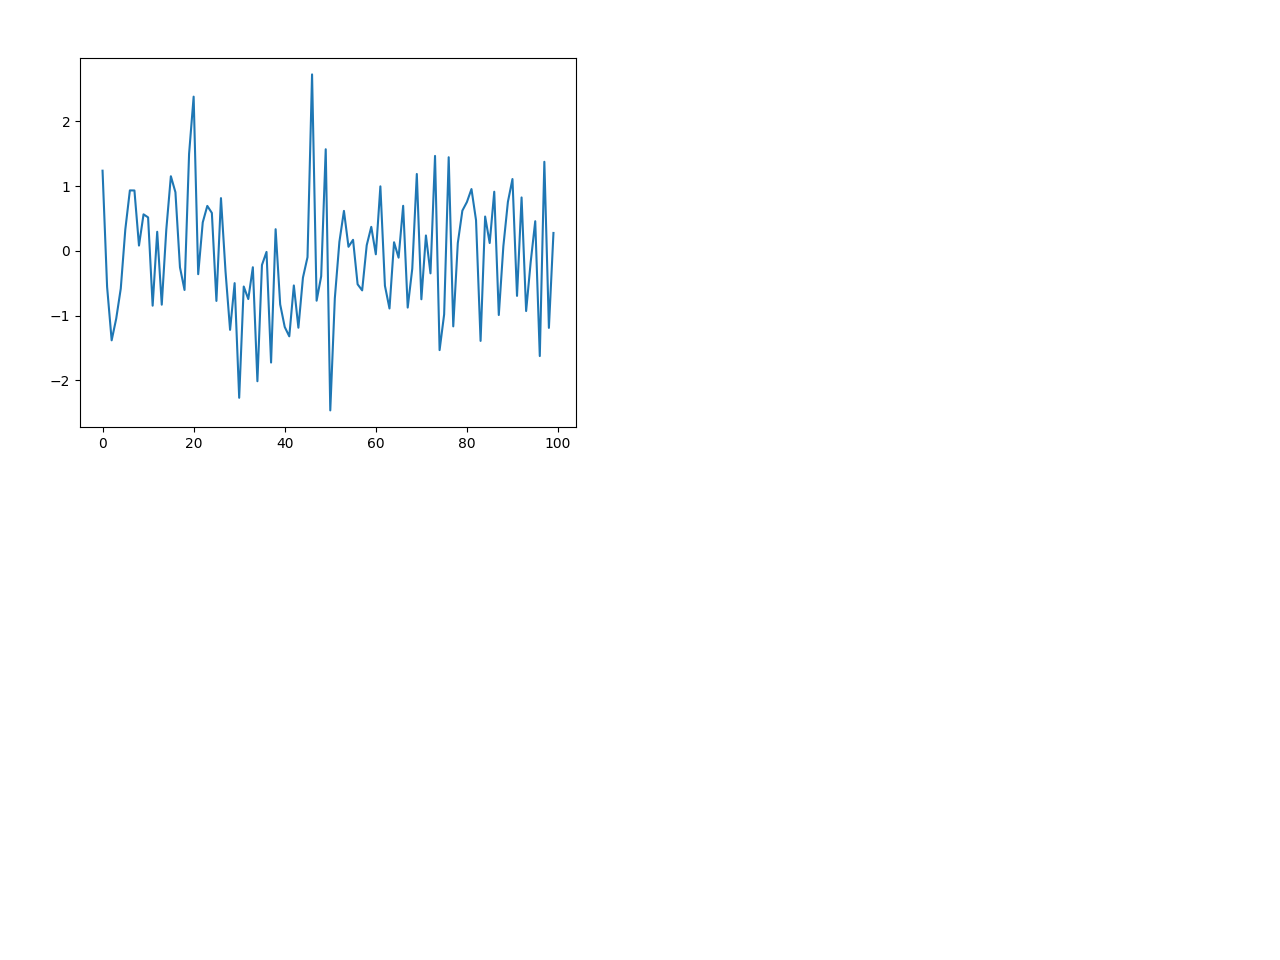

KeyboardInterrupt: 

In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    time.sleep(0.1)
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

In [33]:
%load_ext autoreload
%autoreload 2

print(np.random.randint(50))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
26
